## Данные по оттоку телекоммуникационной компании

Дана выборка абонентов телекоммуникационной компании с указанием абонентов, которые ушли в отток. Задача - определить факторы, которые могут влиять на отток абонентов.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#исходные данные
df = pd.read_csv('telecom_churn.csv', sep = ';')
df[:10]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
#описание полей
descr_df = pd.read_csv('description.csv', sep = ';')
descr_df[descr_df.columns[:2]]

,Название,Описание
0,State,Буквенный код штата
1,Account length,Как долго клиент обслуживается компанией
2,Area code,Префикс номера телефона
3,International plan,Международный роуминг (подключен/не подключен)
4,Voice mail plan,Голосовая почта (подключена/не подключена)
5,Number vmail messages,Количество голосовых сообщений
6,Total day minutes,Общая длительность разговоров днем
7,Total day calls,Общее количество звонков днем
8,Total day charge,Общая сумма оплаты за услуги днем
9,Total eve minutes,Общая длительность разговоров вечером


In [5]:
df.shape

(3333, 20)

In [6]:
#характеристики числовых столбцов
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


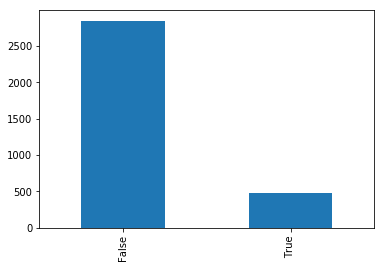

In [7]:
#проверяем какая доля пользователей ушла в отток
df['Churn'].value_counts().plot(kind='bar')

In [8]:
df['Churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

Отток достаточно высокий - около 14,5%

Рассчитаем, существует ли зависимость уровеня оттока от территориального признака:

In [9]:
areas_churn_count = df[df['Churn'] == True].groupby('Area code').count()['Churn']
areas_all_count = df.groupby('Area code').count()['Churn']

In [10]:
areas_churn_count = areas_churn_count / areas_churn_count.sum()
areas_churn_count

Area code
408    0.252588
415    0.488613
510    0.258799
Name: Churn, dtype: float64

In [11]:
areas_all_count = areas_all_count / areas_all_count.sum()
areas_all_count

Area code
408    0.251425
415    0.496550
510    0.252025
Name: Churn, dtype: float64

Распределение в оттоке по территориям совпадает с общим территориальным распределением в выборке, поэтому делаем вывод, что отток не зависит от области нахождения абонента.

Посмотрим на средние показатели по всем столбцам в группах лояльных абонентов и ушедших в отток:

In [12]:
df[df['Churn'] == True].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [13]:
df[df['Churn'] == False].mean()

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Churn                       0.000000
dtype: float64

Можно заметить, что абоненты в оттоке разговаривали больше в дневное и вечернее время, а также совершали большее количество звонков в сервисный центр. Можно предположить, что абоненты оттока более чувствительны к качеству связи, так как имеют большее потребление.

Также посмотрим долю подключений дополнительных услуг в каждой группе: международный роуминг и голосовая почта:

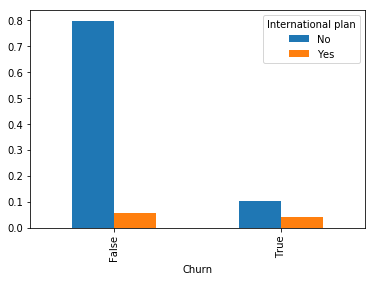

In [14]:
pd.crosstab(df['Churn'], df['International plan'], normalize=True).plot(kind='bar')

In [15]:
intl_true = df[df['International plan'] == 'Yes'].groupby('Churn').count()['International plan']
intl_true = intl_true / intl_true.sum()
intl_true

Churn
False    0.575851
True     0.424149
Name: International plan, dtype: float64

In [16]:
intl_false = df[df['International plan'] == 'No'].groupby('Churn').count()['International plan']
intl_false = intl_false / intl_false.sum()
intl_false

Churn
False    0.88505
True     0.11495
Name: International plan, dtype: float64

Заметим, что доля ушедших в отток намного выше у пользователей международного роуминга, чем у тех, кто данную услугу не подключал - 42% и 11%.

Проверим аналогичные доли на услуге голосовой почты:

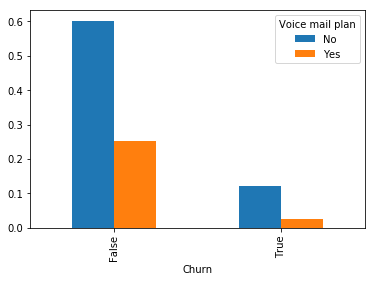

In [17]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True).plot(kind='bar')

In [18]:
voicemail_true = df[df['Voice mail plan'] == 'Yes'].groupby('Churn').count()['International plan']
voicemail_true = voicemail_true / voicemail_true.sum()
voicemail_true

Churn
False    0.913232
True     0.086768
Name: International plan, dtype: float64

In [19]:
voicemail_false = df[df['Voice mail plan'] == 'Yes'].groupby('Churn').count()['International plan']
voicemail_false = voicemail_false / voicemail_false.sum()
voicemail_false

Churn
False    0.913232
True     0.086768
Name: International plan, dtype: float64

Доля пользователей голосовой почты в оттоке достаточно низкая, поэтому можно сделать вывод, что данныя услуга не оказывает влияние на отток абонентов. 

Далее рассчитаем отток в зависимости от количества обращений в сервисный центр.

In [20]:
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0
True,92,122,87,44,76,40,14,5,1,2


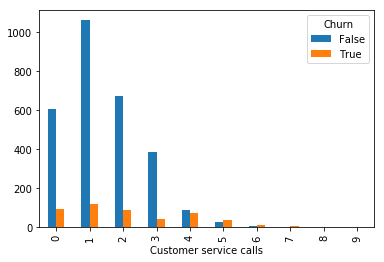

In [21]:
pd.crosstab(df['Customer service calls'], df['Churn']).plot(kind='bar')

Из диаграммы заметно, что доля оттока значительно возрастает при количестве обращений в сервисный центр более 3 раз.

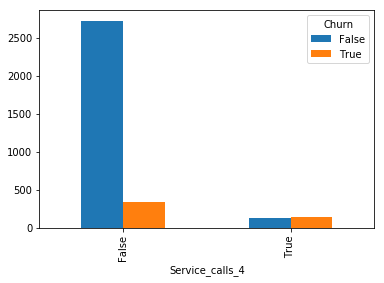

In [22]:
df['Service_calls_4'] = (df['Customer service calls'] > 3)

pd.crosstab(df['Service_calls_4'], df['Churn']).plot(kind='bar')

После изучения основных показателей абонентов, которые ушли в отток, можно сделать вывод, что данные абонеты имеют повышенное потребление услуг связи и более чувствительны к качеству связи, так, уровень оттока после 3 обращений в сервисный центр значительно возрастает. Также одним из факторов является факт подключения услуги международного роуминга, можно предположить, что абоненты, у которых уровень потребления выше среднего, более болезненно реагируют на высокие траты в роуминге, что побуждает их искать альтернативные варианты.